In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam 
import random
from tensorflow.keras.utils import to_categorical 

In [0]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
X_train = X_train.reshape((-1,28, 28, 1))
X_test = X_test.reshape((-1,28, 28, 1))

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
num_classes = 10
#define LeNet model
def LeNet_Model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(lr=.01), loss="categorical_crossentropy", metrics=["accuracy"])
  return model          

In [0]:
model = LeNet_Model()

In [118]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [119]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.1, batch_size=400, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 25us/sample - loss: 0.2057 - acc: 0.9321 - val_loss: 0.0535 - val_acc: 0.9845
Epoch 2/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0455 - val_acc: 0.9880
Epoch 3/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0372 - acc: 0.9888 - val_loss: 0.0457 - val_acc: 0.9858
Epoch 4/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0452 - val_acc: 0.9877
Epoch 5/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0286 - acc: 0.9909 - val_loss: 0.0391 - val_acc: 0.9905
Epoch 6/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0256 - acc: 0.9922 - val_loss: 0.0491 - val_acc: 0.9862
Epoch 7/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0

Text(0.5, 0, 'epoch')

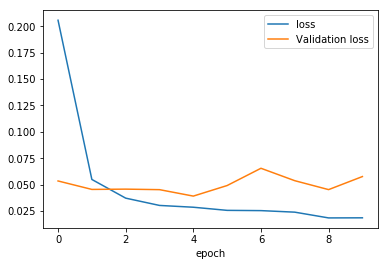

In [120]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "Validation loss"])
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

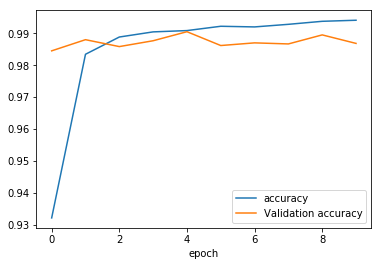

In [121]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["accuracy", "Validation accuracy"])
plt.xlabel("epoch")

In [0]:
import requests
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u"
response = requests.get(url, stream=True)

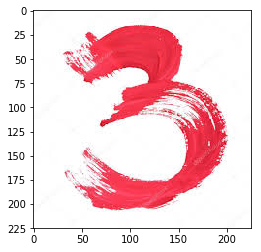

In [123]:
from PIL import Image
img = Image.open(response.raw)
plt.imshow(img)

In [0]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1 )
prediction = model.predict_classes(image)

In [126]:
prediction

array([3])